# Merging the datasets received on Monday January 13th.

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the 'cost_v1.csv' dataset

In [82]:
costs = pd.read_csv('../datasets_v2/cost_v1.csv')

### Loading the 'dwell_time_v1.csv' dataset

In [83]:
dwell_time = pd.read_csv('../datasets_v2/dwell_time_v1.csv')

### Loading the 'mall_traffic.csv' dataset

In [84]:
mall_traffic = pd.read_csv('../datasets_v2/mall_traffic.csv')

### Loading the 'mall_v1.csv' dataset

In [85]:
mall = pd.read_csv('../datasets_v2/mall_v1.csv')

### Loading the 'people_flow_v1.csv' dataset

In [86]:
people_flow = pd.read_csv('../datasets_v2/people_flow_v1.csv')

### Loading the 'referenciel_traffic_v1.csv' dataset

In [87]:
referenciel_traffic = pd.read_csv('../datasets_v2/referenciel_traffic_v1.csv')

### Loading the 'store_v1.csv' dataset

In [88]:
store = pd.read_csv('../datasets_v2/store_v1.csv')

## Merging the dataframes in one

### Merging 'store', 'costs' and 'referenciel_traffic' on 'store_id' key.

In [89]:
df = pd.merge(referenciel_traffic, store, on='store_id', how='inner')

In [90]:
df = pd.merge(df, costs, on='store_id' , how='inner')

### Merging 'people_flow' and 'df' on 'block_id' key.

In [91]:
df = pd.merge(df, people_flow, on=['block_id', 'external_mall_id'], how='inner')

### Merging 'mall' and 'df' on 'mall_id' key.

In [92]:
df = pd.merge(df, mall, on='mall_id', how='inner')

### Merging 'mall_traffic', 'dwell_time' and 'df' on 'external_mall_id' key.

In [93]:
df = pd.merge(df, mall_traffic, on='external_mall_id', how='inner')

In [94]:
df = pd.merge(df, dwell_time, on=['external_mall_id', 'block_id'], how='inner')

## EDA

In [95]:
df.columns

Index(['store_id', 'block_id', 'external_mall_id', 'store_name', 'mall_id',
       'store_year_opened', 'store_year_closed', 'store_branch_level_1',
       'store_branch_level_2', 'store_branch_level_3', 'store_sales_r12m',
       'store_rent_r12m', 'store_area', 'rent_incentive_r12m',
       'service_charges_r12m', 'marketing_costs_r12m',
       'administration_fees_r12m', 'real_estate_taxes_r12m',
       'large_scale_works_r12m', 'maintenance_works_r12m',
       'store_visits_monthly_average', 'store_window_flow_monthly_average',
       'store_visits_daily_average', 'store_window_flow_daily_average',
       'store_total_visits', 'store_total_window_flow',
       'days_with_traffic_data', 'mall_name', 'mall_country',
       'total_mall_area', 'visits_in_monthly_average',
       'visits_out_monthly_average', 'visits_in_daily_average',
       'visits_out_daily_average', 'total_visits_in', 'total_visits_out',
       'avg_dwell_time', 'average_dwell_time', 'median_dwell_time'],
      dtyp

In [96]:
df.shape

(3646, 39)

### Creating a 'total_costs' variable.

In [117]:
df['total_costs'] = (df['service_charges_r12m'] + df['marketing_costs_r12m'] + df['administration_fees_r12m']
                        + df['real_estate_taxes_r12m'] + df['large_scale_works_r12m'] + df['maintenance_works_r12m'])

### Plotting the average costs

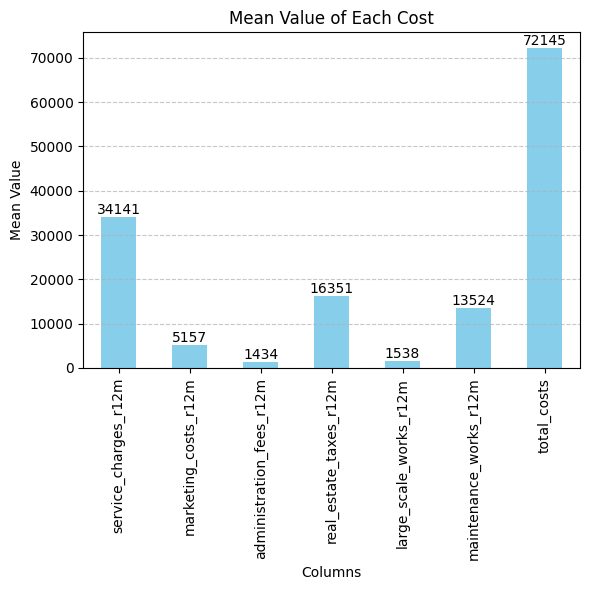

In [118]:
# Calculate the mean of each column
cost_columns = ['service_charges_r12m', 'marketing_costs_r12m', 'administration_fees_r12m',
                        'real_estate_taxes_r12m', 'large_scale_works_r12m', 'maintenance_works_r12m', 'total_costs']
column_means = df[cost_columns].mean()

# Plot the mean values
plt.figure(figsize=(6, 6))
column_means.plot(kind='bar', color='skyblue')
plt.title('Mean Value of Each Cost')
plt.xlabel('Columns')
plt.ylabel('Mean Value')

# Set the x-axis labels vertically
plt.xticks(rotation=90)

for i, value in enumerate(column_means):
    plt.text(i, value, f'{value:.0f}', ha='center', va='bottom', fontsize=10)
    
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjust layout to avoid clipping
plt.show()

### Correlation heatmap of all variables

In [99]:
numerical_df = df.select_dtypes(include=[np.number])

<Axes: >

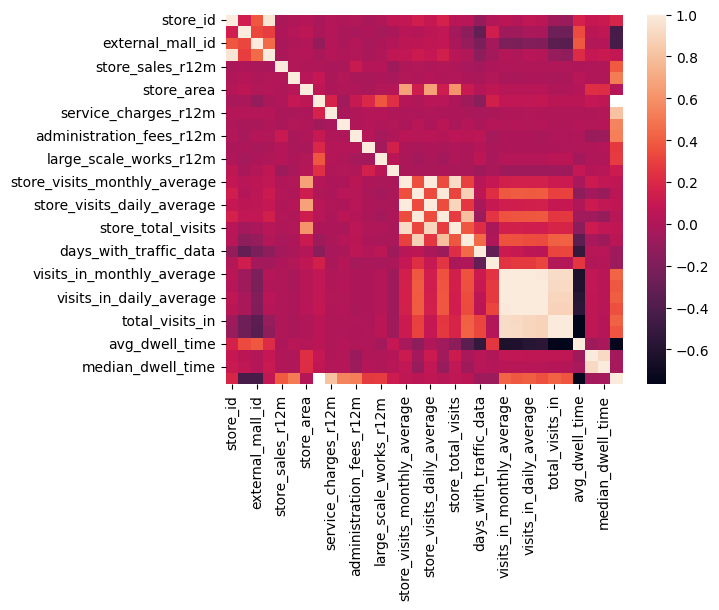

In [100]:
sns.heatmap(numerical_df.corr())

### Columns having missing values, and how many (out of 3646 entries).

In [116]:

missing_values = df.isnull().sum()

# Filtering columns with more than 0 missing values
columns_with_missing = missing_values[missing_values > 0]

print(f"Variables having more than 0 missing values: \n\n{columns_with_missing}")

Variables having more than 0 missing values: 

store_year_closed      3274
rent_incentive_r12m    3573
total_costs            3636
dtype: int64


### Sales vs Rent Scatterplot

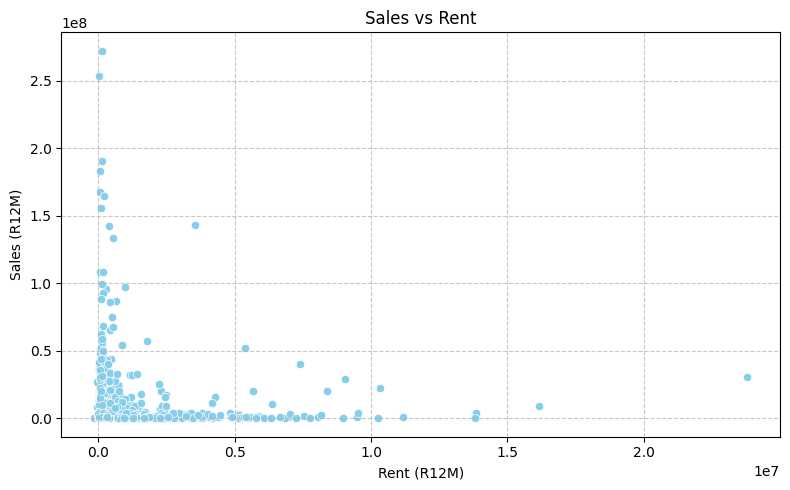

In [102]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='store_rent_r12m', y='store_sales_r12m', color='skyblue')
plt.title('Sales vs Rent')
plt.xlabel('Rent (R12M)')
plt.ylabel('Sales (R12M)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Investigate if Higher Rents Lead to Higher Sales

In [103]:
correlation = df['store_sales_r12m'].corr(df['store_rent_r12m'])
print(f"Correlation between Sales and Rent: {correlation:.2f}")

Correlation between Sales and Rent: 0.01


### Operational Stores

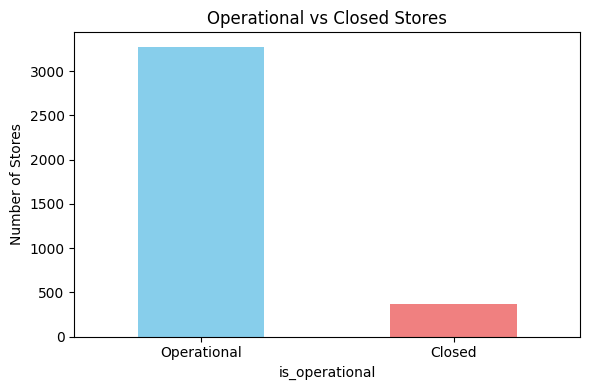

In [104]:
df['is_operational'] = df['store_year_closed'].isna()
operational_counts = df['is_operational'].value_counts()
plt.figure(figsize=(6, 4))
operational_counts.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Operational vs Closed Stores')
plt.xticks([0, 1], ['Operational', 'Closed'], rotation=0)
plt.ylabel('Number of Stores')
plt.tight_layout()
plt.show()

### Trend Analysis of Store Openings and Closures

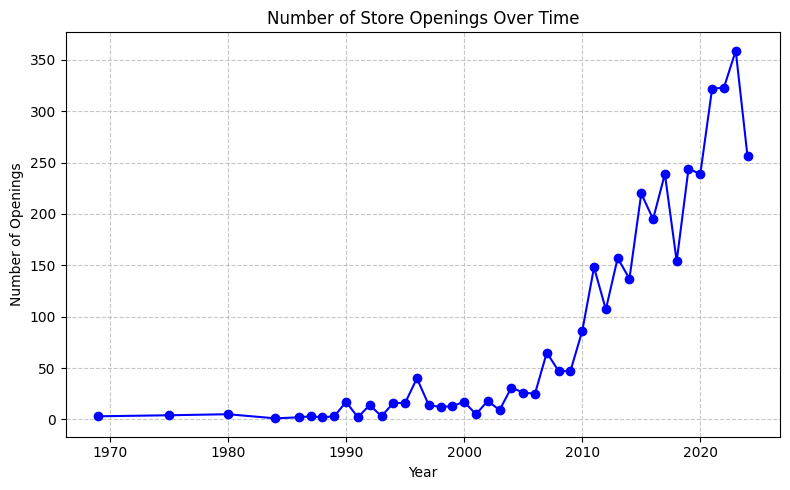

In [105]:
df['store_year_opened'] = pd.to_datetime(df['store_year_opened'], format='%d/%m/%Y')
df['store_year_closed'] = pd.to_datetime(df['store_year_closed'], format='%d/%m/%Y', errors='coerce')
yearly_trends = df.groupby(df['store_year_opened'].dt.year).size()
plt.figure(figsize=(8, 5))
yearly_trends.plot(kind='line', marker='o', color='blue')
plt.title('Number of Store Openings Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Openings')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Branch-Level 1 Performance

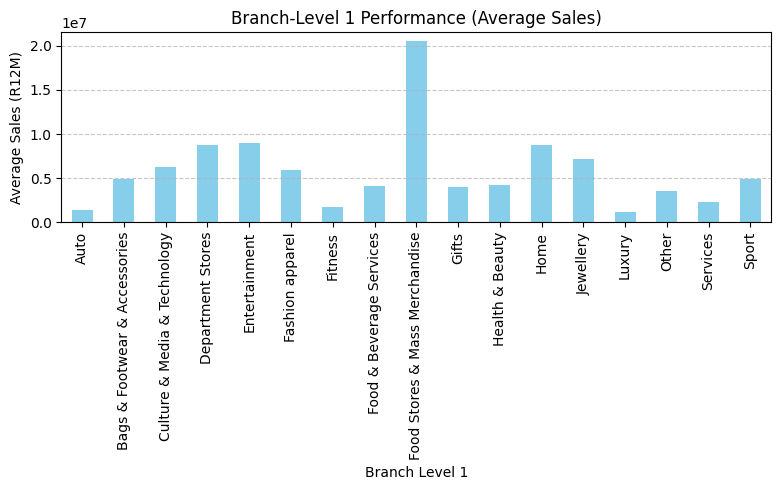

In [106]:
branch_performance = df.groupby('store_branch_level_1')['store_sales_r12m'].mean()

plt.figure(figsize=(8, 5))
branch_performance.plot(kind='bar', color='skyblue')
plt.title('Branch-Level 1 Performance (Average Sales)')
plt.xlabel('Branch Level 1')
plt.ylabel('Average Sales (R12M)')

# Set x-axis labels vertically
plt.xticks(rotation=90)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Branch-Level 1 Costs

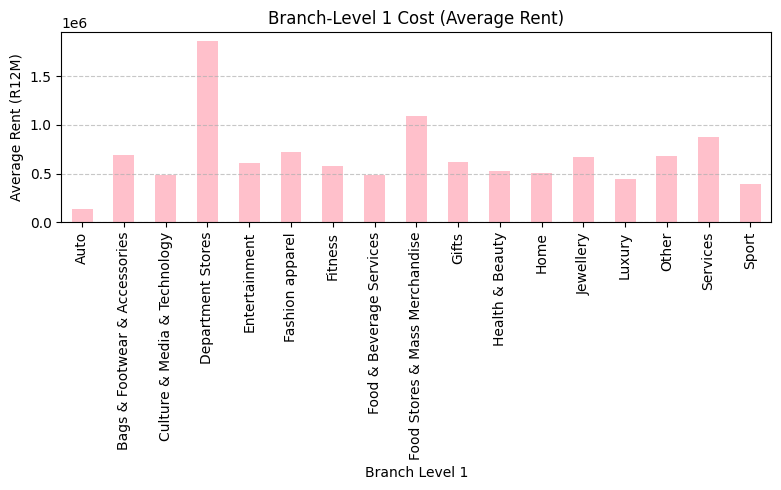

In [107]:
branch_performance = df.groupby('store_branch_level_1')['store_rent_r12m'].mean()

plt.figure(figsize=(8, 5))
branch_performance.plot(kind='bar', color='pink')
plt.title('Branch-Level 1 Cost (Average Rent)')
plt.xlabel('Branch Level 1')
plt.ylabel('Average Rent (R12M)')

# Set x-axis labels vertically
plt.xticks(rotation=90)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Branch-Level 2 Performance

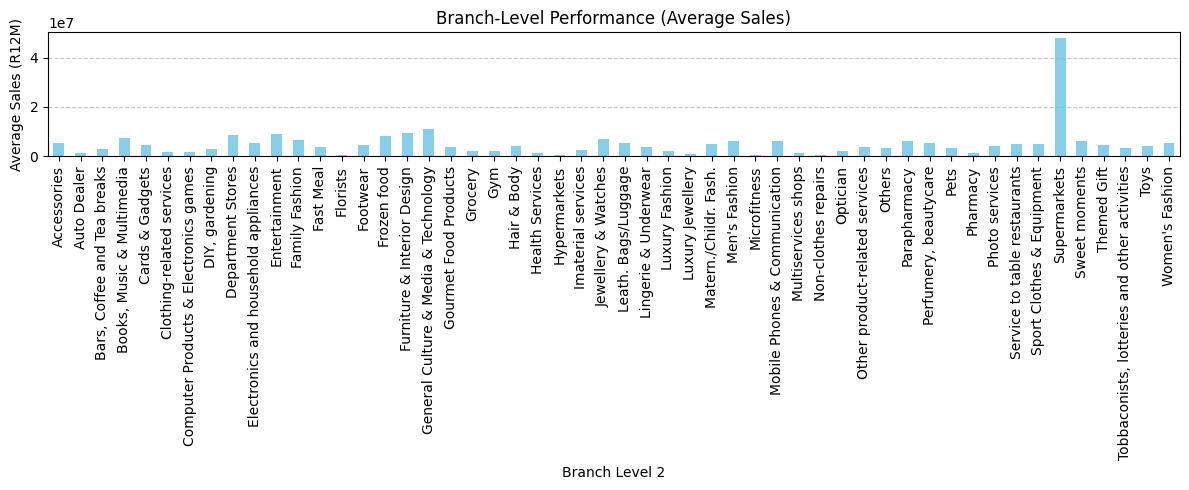

In [108]:
branch_performance = df.groupby('store_branch_level_2')['store_sales_r12m'].mean()

plt.figure(figsize=(12, 5))
branch_performance.plot(kind='bar', color='skyblue')
plt.title('Branch-Level Performance (Average Sales)')
plt.xlabel('Branch Level 2')
plt.ylabel('Average Sales (R12M)')

# Set x-axis labels vertically
plt.xticks(rotation=90)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Mall Sales Analysis

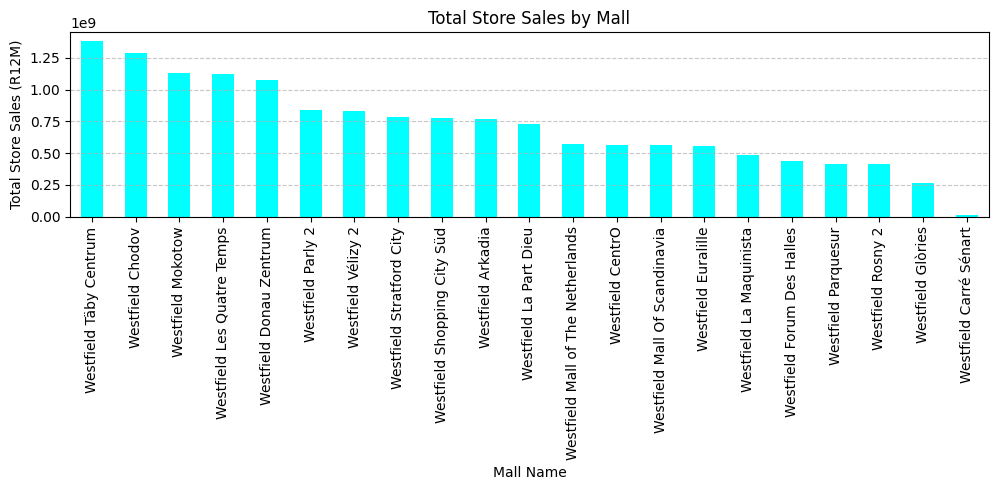

In [109]:
mall_sales = df.groupby('mall_name')['store_sales_r12m'].sum()

plt.figure(figsize=(10, 5))
mall_sales.sort_values(ascending=False).plot(kind='bar', color='cyan')
plt.title('Total Store Sales by Mall')
plt.xlabel('Mall Name')
plt.ylabel('Total Store Sales (R12M)')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Mall Tenant Count Analysis

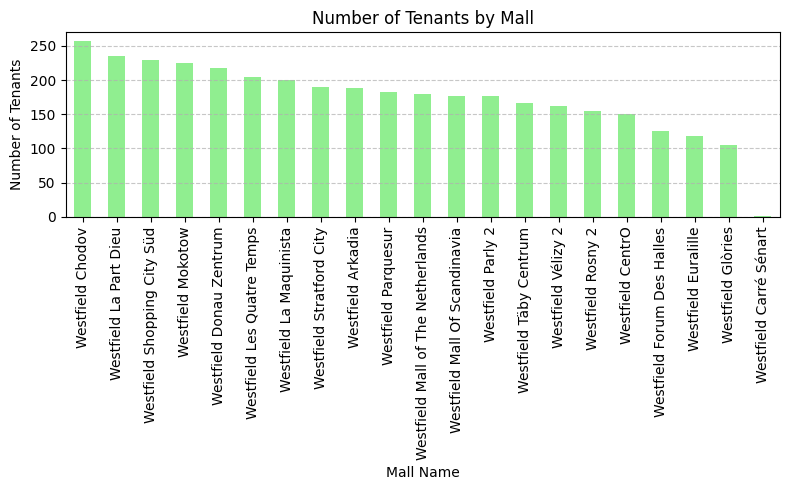

In [110]:
mall_tenants = df['mall_name'].value_counts()

plt.figure(figsize=(8, 5))
mall_tenants.sort_values(ascending=False).plot(kind='bar', color='lightgreen')
plt.title('Number of Tenants by Mall')
plt.xlabel('Mall Name')
plt.ylabel('Number of Tenants')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

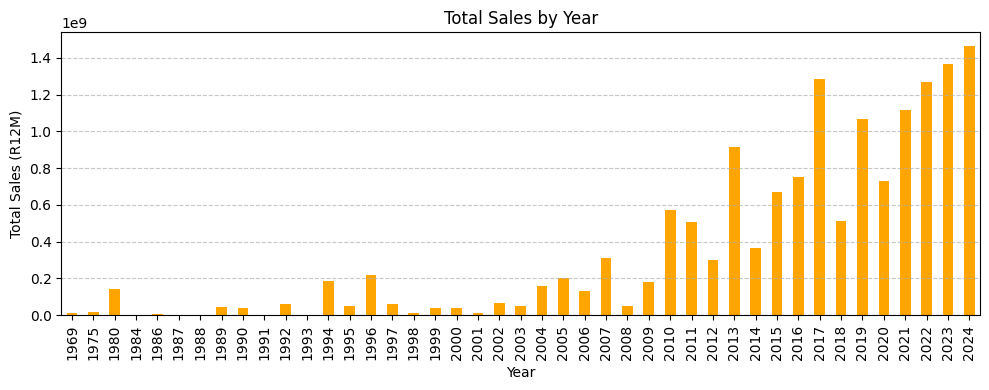

In [111]:
# Ensure the year column is numeric or datetime
df['store_year_opened'] = pd.to_datetime(df['store_year_opened'], errors='coerce').dt.year

# Group by the year and sum the sales
sales_by_year = df.groupby('store_year_opened')['store_sales_r12m'].sum()

# Plot the total sales by year
plt.figure(figsize=(10, 4))
sales_by_year.plot(kind='bar', color='orange')
plt.title('Total Sales by Year')
plt.xlabel('Year')
plt.ylabel('Total Sales (R12M)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [113]:
costs.columns

Index(['store_id', 'rent_incentive_r12m', 'service_charges_r12m',
       'marketing_costs_r12m', 'administration_fees_r12m',
       'real_estate_taxes_r12m', 'large_scale_works_r12m',
       'maintenance_works_r12m'],
      dtype='object')

### alex code

In [ ]:
cost_data = pd.read_csv('data/cost_v1.csv')
dwell_data = pd.read_csv('data/dwell_time_v1.csv')
mall_data = pd.read_csv('data/mall_v1.csv')
mall_traffic_data = pd.read_csv('data/mall_traffic.csv')
people_data = pd.read_csv('data/people_flow_v1.csv')
store_data = pd.read_csv('data/store_v1.csv')
ref_data = pd.read_csv('data/referenciel_traffic_v1.csv')

merge_mall_stores = pd.merge(store_data, mall_data, on='mall_id', how='inner')
merge_first_three = pd.merge(merge_mall_stores, cost_data, how='inner', on='store_id')
cost_df = merge_first_three

cost_df['rent_incentive_r12m'] = cost_df['rent_incentive_r12m'].fillna(0)
cost_df['rent_incentive_r12m'] = cost_df['rent_incentive_r12m'].apply(lambda x: 0 if x > 0 else x)


positive_cost_cols = ['store_id', 'marketing_costs_r12m', 'service_charges_r12m',
       'administration_fees_r12m', 'real_estate_taxes_r12m','large_scale_works_r12m', 'maintenance_works_r12m']

# if values are negative or NaN, replace in cost_df[cost_cols] then replace with mean value for that mall and branch_type_1
for col in positive_cost_cols:
    cost_df[col] = cost_df[col].apply(lambda x: np.nan if x < 0 else x)
    cost_df[col] = cost_df[col].fillna(0)


# replace store sales NaN wiith mena values:
cost_df['store_sales_r12m'] = cost_df['store_sales_r12m'].apply(lambda x: np.nan if x <= 1 else x)
cost_df['store_sales_r12m'] = cost_df['store_sales_r12m'].fillna(
    cost_df.groupby(['mall_id', 'store_branch_level_3'])[col].transform('mean'))
cost_df['store_sales_r12m'] = cost_df['store_sales_r12m'].apply(lambda x: np.nan if x <= 1 else x)
cost_df['store_sales_r12m'] = cost_df['store_sales_r12m'].fillna(
    cost_df.groupby(['mall_id', 'store_branch_level_2'])[col].transform('mean'))

cost_df['store_sales_r12m'] = cost_df['store_sales_r12m'].apply(lambda x: np.nan if x <= 1 else x)
cost_df['store_sales_r12m'] = cost_df['store_sales_r12m'].fillna(
    cost_df.groupby(['mall_id', 'store_branch_level_1'])[col].transform('mean'))

cost_df['store_sales_r12m'] = cost_df['store_sales_r12m'].apply(lambda x: np.nan if x <= 1 else x)
cost_df['store_sales_r12m'] = cost_df['store_sales_r12m'].fillna(
    cost_df.groupby(['mall_id'])[col].transform('mean'))



cost_df['store_rent_r12m'] = cost_df['store_rent_r12m'].apply(lambda x: np.nan if x <= 1 else x)
cost_df['store_rent_r12m'] = cost_df['store_rent_r12m'].fillna(
    cost_df.groupby(['mall_id', 'store_branch_level_3'])[col].transform('mean'))

cost_df['store_rent_r12m'] = cost_df['store_rent_r12m'].apply(lambda x: np.nan if x <= 1 else x)
cost_df['store_rent_r12m'] = cost_df['store_rent_r12m'].fillna(
    cost_df.groupby(['mall_id', 'store_branch_level_2'])[col].transform('mean'))

cost_df['store_rent_r12m'] = cost_df['store_rent_r12m'].apply(lambda x: np.nan if x <= 1 else x)

cost_df['store_rent_r12m'] = cost_df['store_rent_r12m'].fillna(
    cost_df.groupby(['mall_id', 'store_branch_level_1'])[col].transform('mean'))

cost_df['store_rent_r12m'] = cost_df['store_rent_r12m'].apply(lambda x: np.nan if x <= 1 else x)
cost_df['store_rent_r12m'] = cost_df['store_rent_r12m'].fillna(
    cost_df.groupby(['mall_id'])[col].transform('mean'))


# store area
cost_df['store_area'] = cost_df['store_area'].apply(lambda x: np.nan if x <= 1 else x)
cost_df['store_area'] = cost_df['store_area'].fillna(
    cost_df.groupby(['mall_id', 'store_branch_level_3'])['store_area'].transform('mean'))

cost_df['store_area'] = cost_df['store_area'].fillna(
    cost_df.groupby(['mall_id', 'store_branch_level_2'])['store_area'].transform('mean'))

cost_df['store_area'] = cost_df['store_area'].fillna(
    cost_df.groupby(['mall_id', 'store_branch_level_1'])['store_area'].transform('mean'))

cost_df['store_area'] = cost_df['store_area'].fillna(
    cost_df.groupby(['mall_id'])['store_area'].transform('mean'))


# total occupancy cost

cost_df['total_occupancy_cost'] = cost_df['store_rent_r12m'] + cost_df['marketing_costs_r12m'] + cost_df['service_charges_r12m'] + cost_df['administration_fees_r12m'] + cost_df['real_estate_taxes_r12m'] + cost_df['large_scale_works_r12m'] + cost_df['maintenance_works_r12m'] + cost_df['rent_incentive_r12m']

# cost to sales ratio:
cost_df['cost_to_sales_ratio'] = cost_df['total_occupancy_cost'] / cost_df['store_sales_r12m']

# cost to area ratio:
cost_df['cost_to_area_ratio'] = cost_df['total_occupancy_cost'] / cost_df['store_area']


cost_df['store_year_closed'] = pd.to_datetime(cost_df['store_year_closed'], errors='coerce').dt.year


cost_df.to_csv('data/total_cost_df.csv', index=False)

### Imputing NaN values

In [115]:
positive_cost_cols = ['store_id', 'marketing_costs_r12m', 'service_charges_r12m',
       'administration_fees_r12m', 'real_estate_taxes_r12m','large_scale_works_r12m', 'maintenance_works_r12m']

# if values are negative or NaN, replace in cost_df[cost_cols] then replace with mean value for that mall and branch_type_1
for col in positive_cost_cols:
    df[col] = df[col].apply(lambda x: np.nan if x < 0 else x)
    df[col] = df[col].fillna(0)

# replace store sales NaN wiith mena values:
df['store_sales_r12m'] = df['store_sales_r12m'].apply(lambda x: np.nan if x <= 1 else x)
df['store_sales_r12m'] = df['store_sales_r12m'].fillna(
    df.groupby(['mall_id', 'store_branch_level_3'])[col].transform('mean'))
df['store_sales_r12m'] = df['store_sales_r12m'].apply(lambda x: np.nan if x <= 1 else x)
df['store_sales_r12m'] = df['store_sales_r12m'].fillna(
    df.groupby(['mall_id', 'store_branch_level_2'])[col].transform('mean'))

df['store_sales_r12m'] = df['store_sales_r12m'].apply(lambda x: np.nan if x <= 1 else x)
df['store_sales_r12m'] = df['store_sales_r12m'].fillna(
    df.groupby(['mall_id', 'store_branch_level_1'])[col].transform('mean'))

df['store_sales_r12m'] = df['store_sales_r12m'].apply(lambda x: np.nan if x <= 1 else x)
df['store_sales_r12m'] = df['store_sales_r12m'].fillna(
    df.groupby(['mall_id'])[col].transform('mean'))



df['store_rent_r12m'] = df['store_rent_r12m'].apply(lambda x: np.nan if x <= 1 else x)
df['store_rent_r12m'] = df['store_rent_r12m'].fillna(
    df.groupby(['mall_id', 'store_branch_level_3'])[col].transform('mean'))

df['store_rent_r12m'] = df['store_rent_r12m'].apply(lambda x: np.nan if x <= 1 else x)
df['store_rent_r12m'] = df['store_rent_r12m'].fillna(
    df.groupby(['mall_id', 'store_branch_level_2'])[col].transform('mean'))

df['store_rent_r12m'] = df['store_rent_r12m'].apply(lambda x: np.nan if x <= 1 else x)

df['store_rent_r12m'] = df['store_rent_r12m'].fillna(
    df.groupby(['mall_id', 'store_branch_level_1'])[col].transform('mean'))

df['store_rent_r12m'] = df['store_rent_r12m'].apply(lambda x: np.nan if x <= 1 else x)
df['store_rent_r12m'] = df['store_rent_r12m'].fillna(
    df.groupby(['mall_id'])[col].transform('mean'))


# store area
df['store_area'] = df['store_area'].apply(lambda x: np.nan if x <= 1 else x)
df['store_area'] = df['store_area'].fillna(
    df.groupby(['mall_id', 'store_branch_level_3'])['store_area'].transform('mean'))

df['store_area'] = df['store_area'].fillna(
    df.groupby(['mall_id', 'store_branch_level_2'])['store_area'].transform('mean'))

df['store_area'] = df['store_area'].fillna(
   df.groupby(['mall_id', 'store_branch_level_1'])['store_area'].transform('mean'))

df['store_area'] = df['store_area'].fillna(
    df.groupby(['mall_id'])['store_area'].transform('mean'))